<a href="https://colab.research.google.com/github/manjulasivasankar/Topic-Modeling/blob/master/lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from gensim.corpora import Dictionary
from gensim.models import ldamodel
import numpy
%matplotlib inline

In [5]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

     |████████████████████████████████| 1.6MB 5.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=3ec793d14dcd21a9a47f420bd81b2b9c158facc53949e58f377d0c60fe702849
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [6]:
# NLTK Stop words
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [95]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [27]:
from google.colab import files
uploaded = files.upload()

Saving pubnew.csv to pubnew.csv


In [40]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "pubnew.csv" with length 6139662 bytes


In [52]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['pubnew.csv'].decode("utf-8", "replace")))


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5418 entries, 0 to 5417
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                       

In [53]:
df.head(5)

,(In Press) Aggregation behavior of ionic liquid in molecular liquid medium: a dynamic light scattering study,"The aggregation behavior of a tri-n-octylmethylammonium bis(2-ethylhexyl)phosphate ([N1888][D2EHP]) in n-dodecane (n-DD) was investigated in detail by dynamic light scattering studies. The aggregate size was measured as a function of various parameters such as concentration of [N1888][D2EHP] in organic phase, concentration of nitric acid and Nd(III) in aqueous phase, and temperature of the system. The aggregate size increased with increase in the concentration of nitric acid and [N1888][D2EHP] in organic phase. The aggregate formation of [N1888][D2EHP] phase was compared with [N1888][NO3] and bis(2-ethylhexyl)phosphoric acid (D2EHPA) formed in organic phase upon nitric acid extraction. The results are reported in this paper."
0,\tMeasurement and modelling of the thermodyna...,"A soft magnetic alloy, Ni51Fe36Co13 is used as..."
1,\tMeasurements of Natural Radionuclides by Gam...,Guide to the Expression of Uncertainty in Meas...
2,Microstructure and mechanical properties of A-...,The present work discusses the microstructure ...
3,Optimization of treatment of Cs137 bearing rad...,This paper predicts the performance of annular...
4,Redox Behavior of Moisture in LiCl-KCl Eutecti...,In order to develop a flow sheet for the purif...


In [57]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['tmeasurement', 'and', 'modelling', 'of', 'the', 'thermodynamic', 'properties', 'of', 'ni', 'fe', 'co', 'soft', 'magnetic', 'alloy', 'soft', 'magnetic', 'alloy', 'ni', 'fe', 'co', 'is', 'used', 'as', 'the', 'sensor', 'in', 'temperature', 'sensitive', 'magnetic', 'switch', 'circuit', 'of', 'diverse', 'safety', 'rod', 'drive', 'mechanism', 'of', 'advanced', 'fast', 'breeder', 'reactors', 'in', 'the', 'present', 'work', 'the', 'magnetic', 'and', 'thermodynamic', 'properties', 'of', 'this', 'indigenously', 'developed', 'soft', 'ferromagnetic', 'alloy', 'were', 'measured', 'using', 'variety', 'of', 'experimental', 'techniques', 'the', 'alloy', 'has', 'single', 'phase', 'face', 'centered', 'cubic', 'structure', 'from', 'room', 'temperature', 'up', 'to', 'with', 'the', 'curie', 'transition', 'at', 'temperature', 'dependent', 'enthalpy', 'increment', 'dilatation', 'and', 'thermal', 'diffusivity', 'were', 'measured', 'from', 'to', 'and', 'the', 'corresponding', 'values', 'for', 'isobaric', 'h

In [58]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [59]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [60]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['tmeasurement', 'and', 'modelling', 'of', 'the', 'thermodynamic', 'properties', 'of', 'ni', 'fe', 'co', 'soft', 'magnetic', 'alloy', 'soft', 'magnetic', 'alloy', 'ni', 'fe', 'co', 'is', 'used', 'as', 'the', 'sensor', 'in', 'temperature', 'sensitive', 'magnetic', 'switch', 'circuit', 'of', 'diverse_safety', 'rod_drive', 'mechanism', 'of', 'advanced', 'fast_breeder_reactors', 'in', 'the', 'present', 'work', 'the', 'magnetic', 'and', 'thermodynamic', 'properties', 'of', 'this', 'indigenously_developed', 'soft', 'ferromagnetic', 'alloy', 'were', 'measured', 'using', 'variety', 'of', 'experimental', 'techniques', 'the', 'alloy', 'has', 'single', 'phase', 'face_centered_cubic', 'structure', 'from', 'room', 'temperature', 'up', 'to', 'with', 'the', 'curie', 'transition', 'at', 'temperature', 'dependent', 'enthalpy_increment', 'dilatation', 'and', 'thermal', 'diffusivity', 'were', 'measured', 'from', 'to', 'and', 'the', 'corresponding', 'values', 'for', 'isobaric', 'heat_capacity', 'coefficie

In [61]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [62]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['model', 'thermodynamic', 'property', 'co', 'soft', 'magnetic', 'alloy', 'soft', 'magnetic', 'alloy', 'use', 'sensor', 'temperature', 'sensitive', 'magnetic', 'switch', 'circuit', 'mechanism', 'advance', 'fast_breed', 'reactor', 'present', 'work', 'magnetic', 'thermodynamic', 'property', 'soft', 'ferromagnetic', 'alloy', 'measure', 'use', 'variety', 'experimental', 'technique', 'alloy', 'single', 'phase', 'face_centere', 'cubic', 'structure', 'room', 'temperature', 'curie', 'transition', 'temperature', 'dependent', 'enthalpy_increment', 'dilatation', 'thermal', 'diffusivity', 'measure', 'corresponding', 'value', 'isobaric', 'heat', 'capacity', 'thermal', 'conductivity', 'determine', 'addition', 'also', 'estimate', 'use', 'technique', 'course', 'evaluation', 'thermodynamic', 'property', 'contribution', 'due', 'magnetic', 'ordering', 'treat', 'separately', 'use', 'calphad', 'approach', 'indicate', 'magneto', 'volume', 'effect', 'understand', 'low', 'temperature', 'behavior', 'calculati

In [63]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 5), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 6), (37, 1), (38, 3), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 4), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 3), (57, 1), (58, 1), (59, 1), (60, 2), (61, 4), (62, 1), (63, 2), (64, 5), (65, 1), (66, 1), (67, 1), (68, 5), (69, 1), (70, 1), (71, 1), (72, 1)]]


In [65]:
n=15
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True              
                                           ) 

In [66]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.085*"temperature" + 0.031*"high" + 0.029*"pressure" + 0.022*"structural" '
  '+ 0.021*"mode" + 0.021*"phase" + 0.021*"structure" + 0.020*"range" + '
  '0.018*"transition" + 0.016*"glass"'),
 (1,
  '0.050*"material" + 0.036*"process" + 0.020*"performance" + '
  '0.018*"parameter" + 0.017*"provide" + 0.015*"control" + 0.014*"application" '
  '+ 0.013*"nuclear" + 0.013*"make" + 0.013*"transfer"'),
 (2,
  '0.053*"phase" + 0.029*"solution" + 0.024*"extraction" + 0.020*"sensor" + '
  '0.017*"uranium" + 0.017*"use" + 0.017*"concentration" + 0.016*"aqueous" + '
  '0.015*"study" + 0.015*"formation"'),
 (3,
  '0.097*"steel" + 0.049*"stress" + 0.042*"strain" + 0.039*"creep" + '
  '0.037*"weld" + 0.032*"rate" + 0.029*"deformation" + 0.026*"stainless" + '
  '0.025*"strength" + 0.024*"test"'),
 (4,
  '0.062*"laser" + 0.035*"transient" + 0.023*"sodium_coole" + 0.023*"hybrid" + '
  '0.020*"facility" + 0.020*"capture" + 0.020*"bubble" + 0.018*"melt" + '
  '0.016*"build" + 0.015*"inspection"')

In [67]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.788713536864079

Coherence Score:  0.4259022033241398


In [68]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.228713  0.085649       1        1  17.380089
13    -0.095608 -0.224089       2        1   8.785487
11    -0.032816 -0.166447       3        1   8.709650
7     -0.161074 -0.015199       4        1   8.652956
14    -0.128245  0.086471       5        1   7.778329
0     -0.108761  0.165410       6        1   7.707627
2     -0.136460  0.006313       7        1   6.979081
1      0.008304 -0.245893       8        1   6.728639
3     -0.012145 -0.032404       9        1   5.708060
10     0.089596  0.203222      10        1   5.260556
8     -0.016450  0.071080      11        1   4.988068
9      0.105333  0.075521      12        1   4.508336
5      0.222308  0.032987      13        1   3.033571
6      0.246581 -0.059386      14        1   2.202734
4      0.248150  0.016765      15        1   1.576817, topic_info=             Term         Freq        Total Category  logprob  loglift
61    temperature  3762.000000  3762.000000  Default  30.0000  30.0000
325         steel  2270.000000  2270.000000  Default  29.0000  29.0000
68            use  5838.000000  5838.000000  Default  28.0000  28.0000
44          phase  2731.000000  2731.000000  Default  27.0000  27.0000
484      material  1795.000000  1795.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
801         laser   405.413913   477.771041  Topic15  -2.7742   3.9855
341      relation    91.006481   103.639263  Topic15  -4.2681   4.0198
971        period    70.912603    97.732837  Topic15  -4.5176   3.8290
257          melt   115.555484   219.481136  Topic15  -4.0293   3.5082
1560        lower    45.436015    66.981339  Topic15  -4.9628   3.7617

[766 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
904       1  0.997016    absorption
707       4  0.994520      accident
4857      4  0.994143  accumulation
73        2  0.989843      accuracy
937       4  0.987429      accurate
...     ...       ...           ...
3213      1  0.997882            wt
1457      1  0.996671           xrd
1552      9  0.405636         yield
1552     13  0.591348         yield
164       5  0.995516          zone

[1184 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 14, 12, 8, 15, 1, 3, 2, 4, 11, 9, 10, 6, 7, 5])

In [70]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [71]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

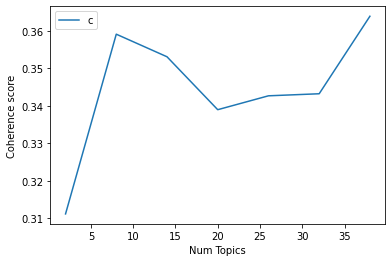

In [72]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [73]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3111
Num Topics = 8  has Coherence Value of 0.3591
Num Topics = 14  has Coherence Value of 0.3531
Num Topics = 20  has Coherence Value of 0.339
Num Topics = 26  has Coherence Value of 0.3427
Num Topics = 32  has Coherence Value of 0.3432
Num Topics = 38  has Coherence Value of 0.3639


In [74]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.012*"study" + 0.010*"metal" + 0.008*"ion" + 0.008*"experimental" + '
  '0.007*"use" + 0.006*"jet" + 0.006*"growth" + 0.006*"model" + 0.006*"high" + '
  '0.006*"find"'),
 (1,
  '0.012*"use" + 0.012*"study" + 0.010*"temperature" + 0.010*"increase" + '
  '0.009*"irradiate" + 0.009*"ion" + 0.008*"defect" + 0.008*"interaction" + '
  '0.007*"effect" + 0.007*"concentration"'),
 (2,
  '0.017*"use" + 0.013*"scheme" + 0.010*"density" + 0.010*"high" + '
  '0.009*"tool" + 0.009*"coating" + 0.009*"study" + 0.009*"steel" + '
  '0.009*"coat" + 0.009*"powder"'),
 (3,
  '0.015*"flow" + 0.011*"pump" + 0.011*"use" + 0.010*"device" + 0.009*"bundle" '
  '+ 0.009*"base" + 0.008*"source" + 0.008*"efficiency" + 0.007*"system" + '
  '0.007*"frequency"'),
 (4,
  '0.025*"temperature" + 0.017*"high" + 0.017*"study" + 0.016*"phase" + '
  '0.013*"property" + 0.013*"use" + 0.012*"pressure" + 0.010*"increase" + '
  '0.009*"find" + 0.008*"show"'),
 (5,
  '0.014*"use" + 0.011*"study" + 0.011*"reactor" + 0.011

In [75]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)
#print(df_dominant_topic)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14.0,0.8188,"temperature, phase, strain, increase, steel, s...",[ \tMeasurement and modelling of the thermodyn...
1,1,10.0,0.9860,"sodium, study, use, reactor, temperature, pipe...",[\tMeasurements of Natural Radionuclides by Ga...
2,2,17.0,0.4270,"creep, deformation, use, steel, rate, stress, ...",[Microstructure and mechanical properties of A...
3,3,3.0,0.9367,"flow, pump, use, device, bundle, base, source,...",[Optimization of treatment of Cs137 bearing ra...
4,4,11.0,0.5125,"study, use, mode, temperature, increase, show,...",[Redox Behavior of Moisture in LiCl-KCl Eutect...
5,5,8.0,0.5323,"film, property, use, high, coating, substrate,...",[\tRobust nickel-reduced graphene oxide-myrist...
6,6,4.0,0.9789,"temperature, high, study, phase, property, use...","[Thermodynamic studies on Pr2TeO6, The standar..."
7,7,13.0,0.4976,"use, concentration, study, activity, sample, h...",[Vacancy Loop Contribution to Irradiation-Indu...
8,8,9.0,0.5291,"dynamic, effect, stress, steel, use, bellow, t...",[Dynamics of a crystal containing a molecular ...
9,9,4.0,0.6833,"temperature, high, study, phase, property, use...",[STRUCTURE AND SUPERCONDUCTIVITY OF PB1-XAXMO6...


In [76]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,14.0,"temperature, phase, strain, increase, steel, s...",155.0,0.0286
1.0,10.0,"sodium, study, use, reactor, temperature, pipe...",152.0,0.0281
2.0,17.0,"creep, deformation, use, steel, rate, stress, ...",98.0,0.0181
3.0,3.0,"flow, pump, use, device, bundle, base, source,...",91.0,0.0168
4.0,11.0,"study, use, mode, temperature, increase, show,...",786.0,0.1451
...,...,...,...,...
5413.0,16.0,"corrosion, resistance, surface, study, concret...",NaN,NaN
5414.0,12.0,"magnetic, phase, use, study, field, extraction...",NaN,NaN
5415.0,18.0,"use, study, analysis, base, thermal, powder, c...",NaN,NaN
5416.0,12.0,"magnetic, phase, use, study, field, extraction...",NaN,NaN


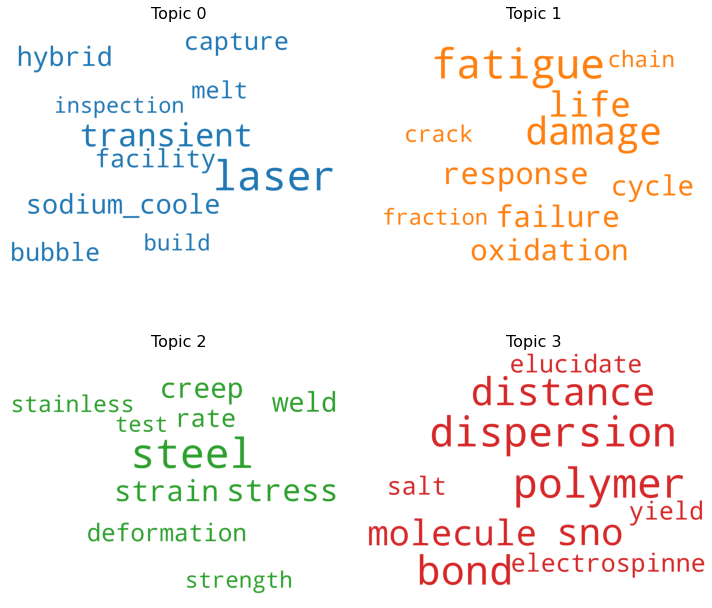

In [77]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


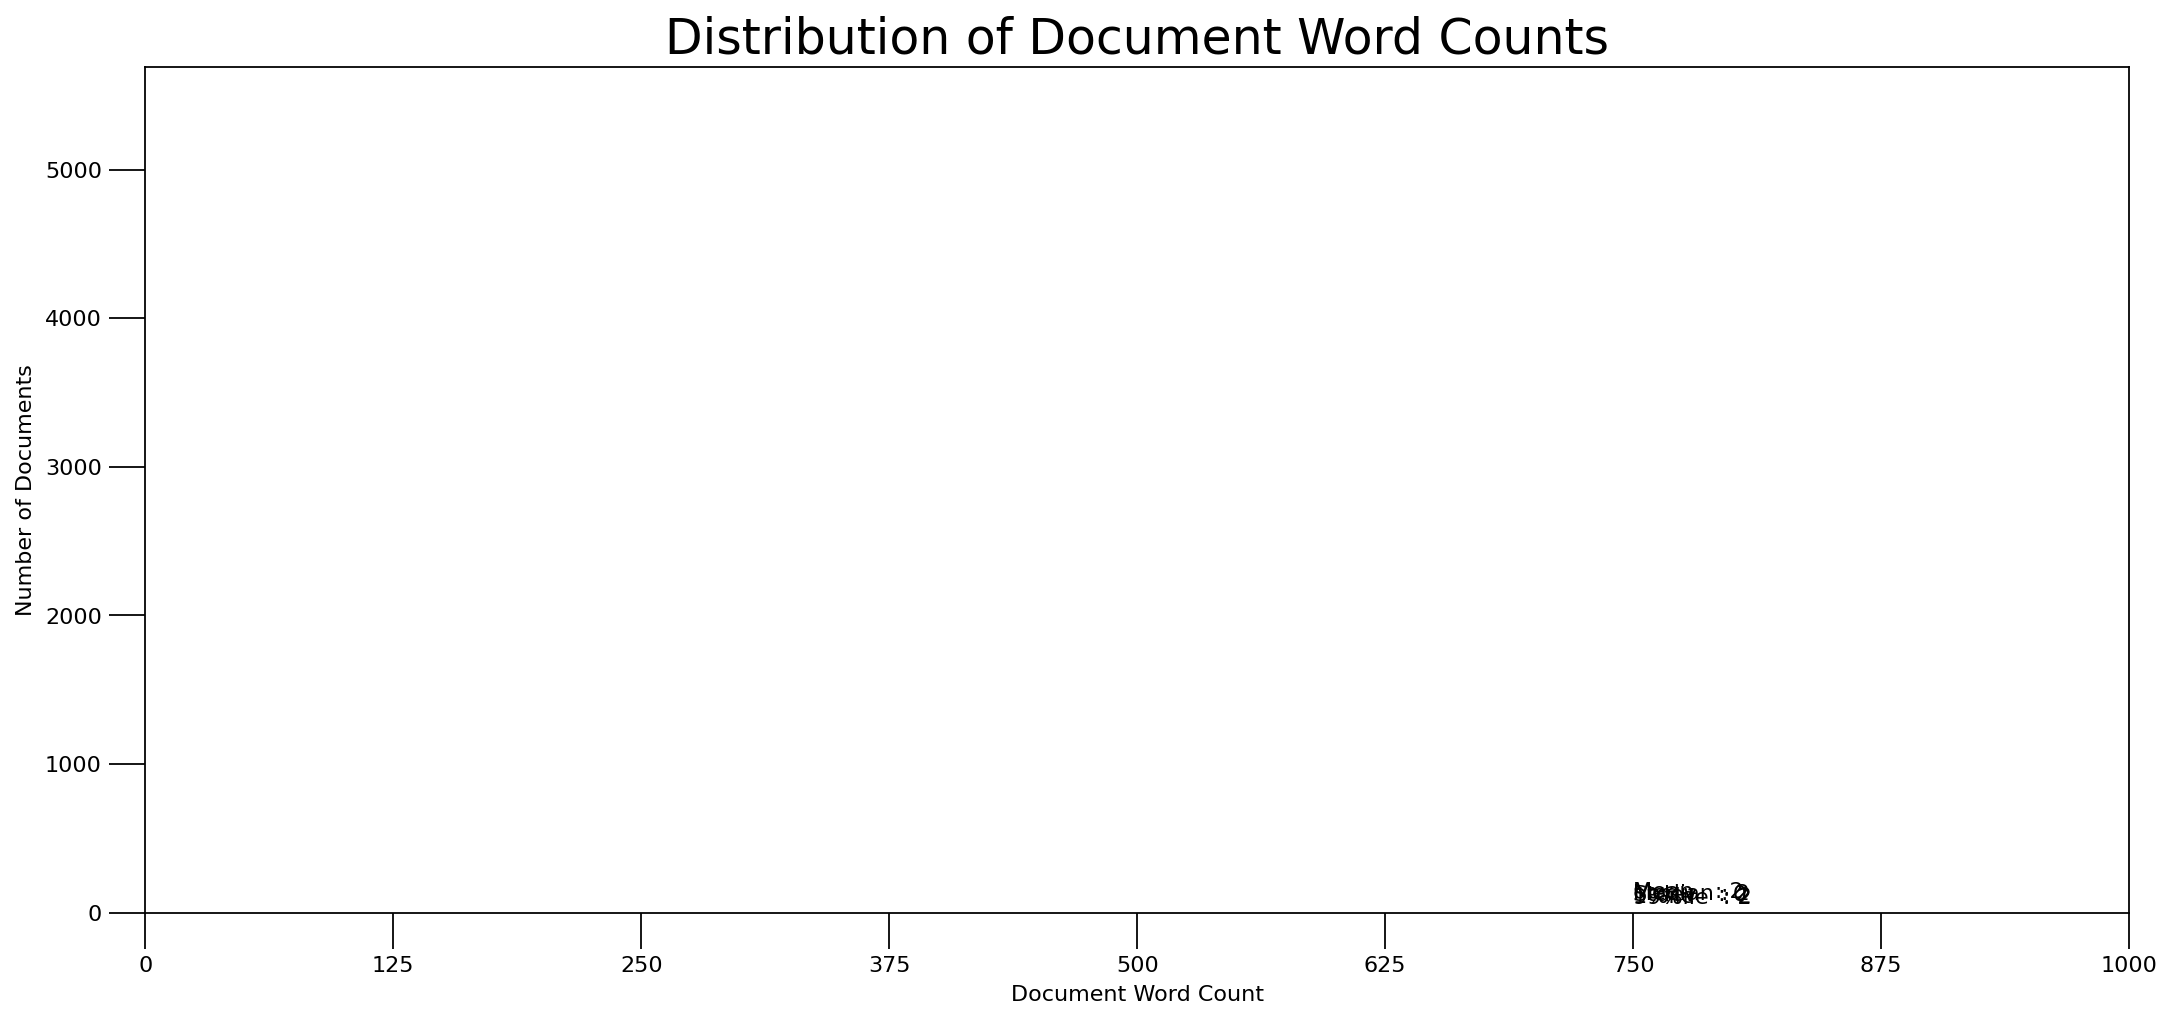

In [78]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


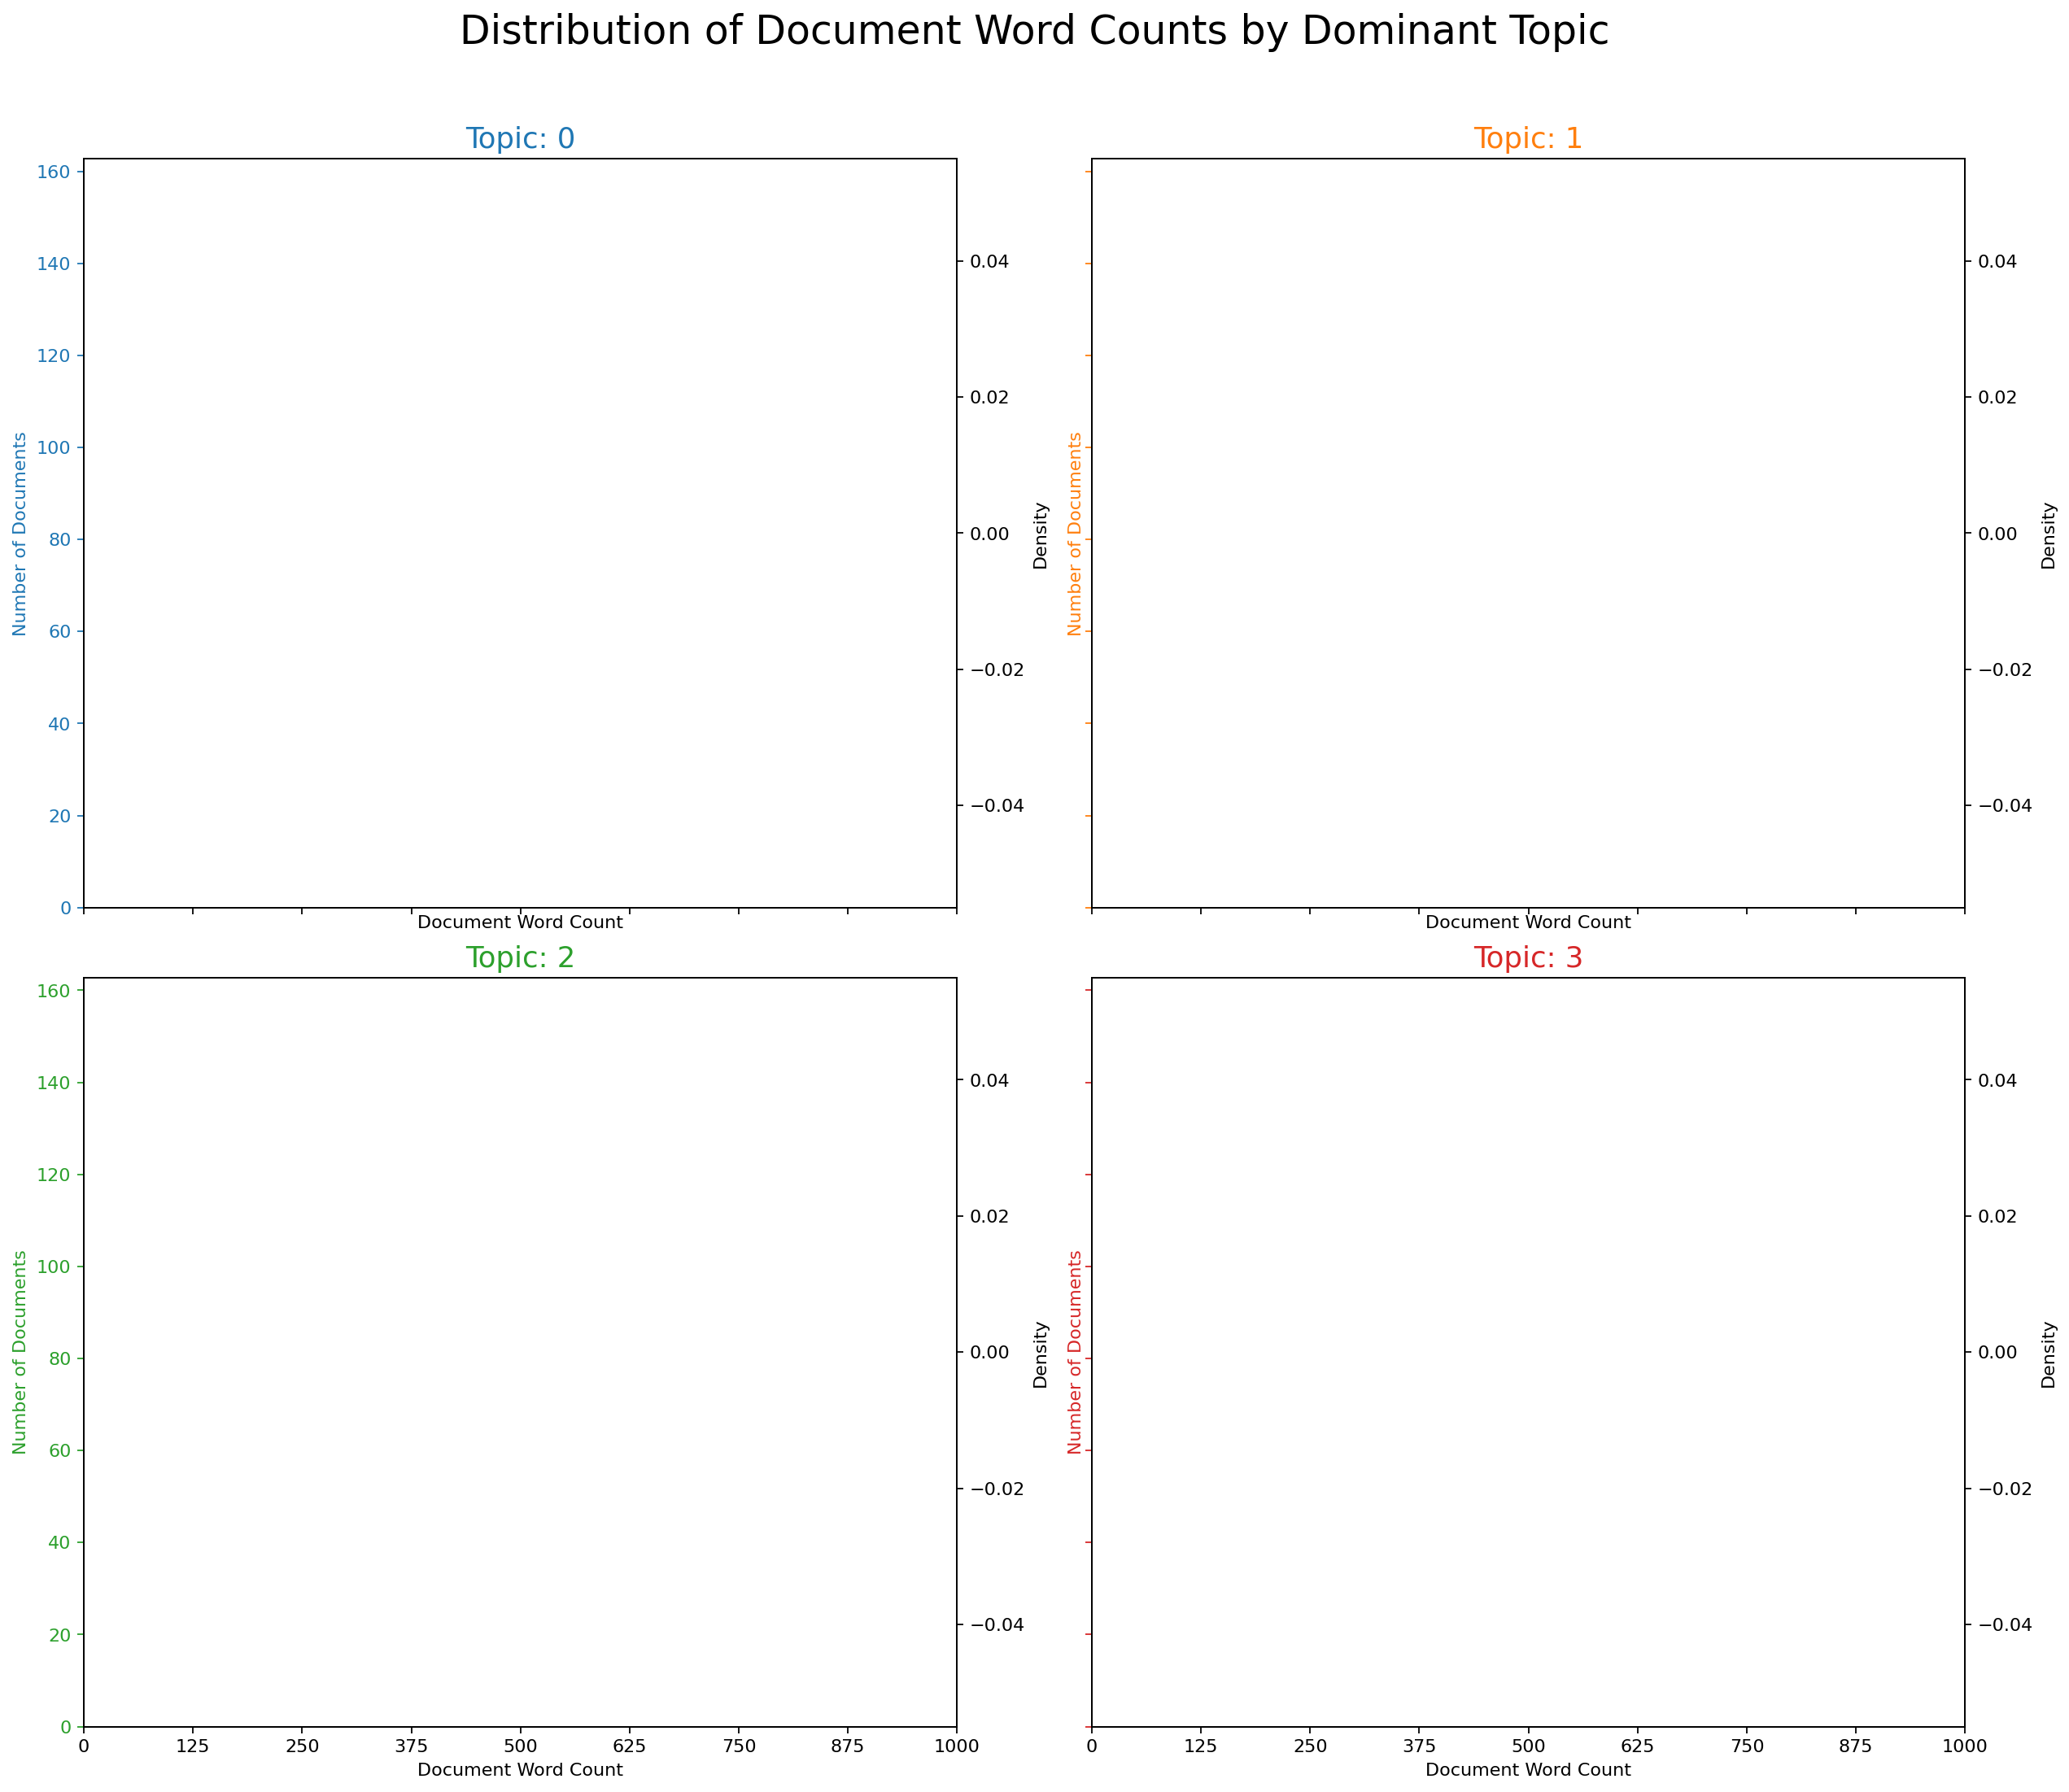

In [79]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

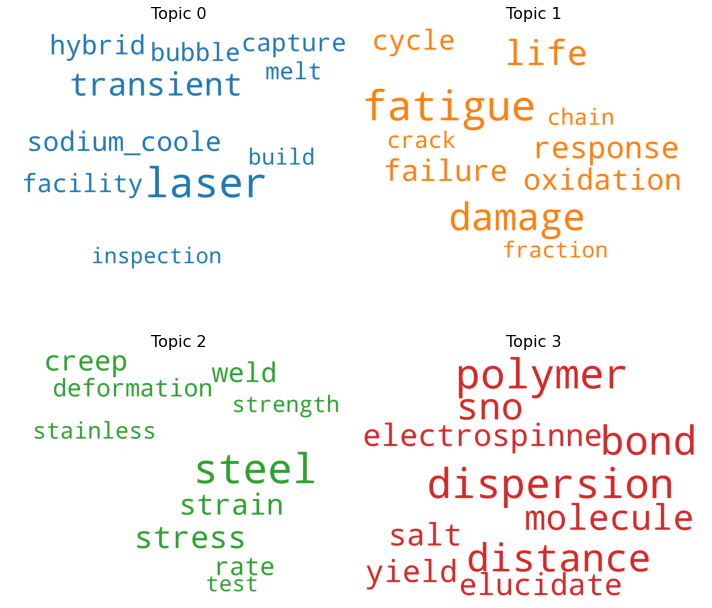

In [80]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()